# Geographic Analysis (Kai)
 - Map crime incidents to see if certain neighborhoods or districts have higher rates of specific offenses.

# Import functions


In [1]:
# import functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define Functions

In [2]:
def top_num(table, column,top_num = 5):
    """
    This function is used to extracts the top N values from a specified column in a DataFrame.

    Parameters:
    table (DataFrame): The dataset (csv)
    column (str): The name of the column to extract values from.
    top_num (int): Number of top values to return (default is 5).

    Returns:
    list: A list containing the top N values from the specified column.
    """
    lst = []
    for i in table[column].head(top_num):
        lst.append(i)
    return lst

In [3]:
# load the data
FILENAME = '/Users/williamweng/Desktop/Data Science 2500/Project/crime2023.csv'
df = pd.read_csv(FILENAME)

/var/folders/zp/zpwrqphj2xl2djgv61cl_xrm0000gn/T/ipykernel_3968/710624667.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILENAME)


In [4]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,232007173,3115,NaN,INVESTIGATE PERSON,B3,,0,2023-01-27 22:44:00+00,2023,1,Friday,22,NaN,FAVRE ST,42.271661,-71.099535,"(42.271661031027065, -71.09953455161765)"
1,232004454,3301,NaN,VERBAL DISPUTE,B2,316,0,2023-01-17 20:21:00+00,2023,1,Tuesday,20,NaN,HAROLD ST,42.312596,-71.092876,"(42.3125962960786, -71.09287583752645)"
2,232006290,3115,NaN,INVESTIGATE PERSON,A1,,0,2023-01-24 00:00:00+00,2023,1,Tuesday,0,NaN,HANOVER ST,42.365699,-71.052892,"(42.3656993584582, -71.05289203191269)"
3,232024939,3114,NaN,INVESTIGATE PROPERTY,B3,,0,2023-03-31 17:14:00+00,2023,3,Friday,17,NaN,BLUE HILL AVE,42.292788,-71.088520,"(42.29278799134922, -71.08851953962399)"
4,232006708,423,NaN,ASSAULT - AGGRAVATED,B2,,0,2023-01-26 09:00:00+00,2023,1,Thursday,9,NaN,HUTCHINGS ST,42.310269,-71.089311,"(42.310268910354935, -71.08931055058088)"


# 1. Which locations (districts or streets) are hotspots for violent crimes
  - 1. Filter features of locations and violent crimes ('STREET' , 'DISTRICT' , 'OFFENSE_DESCRIPTION')
  - 2. Sum the total number of crimes in each district and stree, and sort the names of top 5 street and district
  - 3. Extract out the names of top 5 streets and districts and append them into a list for the future use.

In [5]:
# Step 1: Select relevant columns
hotspots_features = ['DISTRICT', 'STREET', 'OFFENSE_DESCRIPTION']
# drop the empty value in dataset 
df_filtered = df[hotspots_features].dropna(subset=['DISTRICT', 'STREET', 'OFFENSE_DESCRIPTION'])

In [7]:
# Group the data by 'DISTRICT' and calculate the total number of crimes per district, 
# Reset index and name the count column as 'TOTAL_CRIMES'
crime_by_district = df_filtered.groupby('DISTRICT').size().reset_index(name='TOTAL_CRIMES')

# Group the data by 'STREET' and calculate the total number of crimes per street, 
# Reset index and name the count column as 'TOTAL_CRIMES'
crime_by_street = df_filtered.groupby('STREET').size().reset_index(name='TOTAL_CRIMES')

# Sort the data to find the most dangerous locations
dangerous_districts = crime_by_district.sort_values(by='TOTAL_CRIMES', ascending=False)
dangerous_streets = crime_by_street.sort_values(by='TOTAL_CRIMES', ascending=False)

In [10]:
# Using the function above to achieve top 5 dangerous streets in Boston. Return as the name of the streets
top5_streets = top_num(dangerous_streets, 'STREET', 5)
top5_street = top_num(dangerous_districts, 'DISTRICT', 5)

print(f'Name of Top 5 streets: {top5_streets}')
print(f'Name of Top 5 Districts: {top5_street}')

Name of Top 5 streets: ['WASHINGTON ST', 'BLUE HILL AVE', 'HARRISON AVE', 'GIBSON ST', 'CENTRE ST']
Name of Top 5 Districts: ['D4', 'B2', 'A1', 'C11', 'B3']


# 2. What are the top 5 offense types and their counts for the top 5 streets and districts with the highest crime rates? (e.g., thefts, burglaries, shootings)? 
  - 1. Using the names of top 5 streets and districts to filter out the information only related to those 5 names.
  - 2. Calculate the number of all crimes of top 5 districts and streets
  - 3. Order the number of crime from highest to lowest in order to get the names of top 5 crimes.

In [13]:
# We are only looking for the top 5 dangerous streets and districts in whole dataset.
top_streets_data = df_filtered[df_filtered['STREET'].isin(top5_streets)]
top_districts_data = df_filtered[df_filtered['DISTRICT'].isin(top5_street)]

# Group the data by 'STREET' and 'OFFENSE_DESCRIPTION' and calculate the total number of crimes in each top 5 streets, 
# Reset index and name the count column as 'Number_Crimes'
offense_num_streets = top_streets_data.groupby(['STREET', 'OFFENSE_DESCRIPTION']).size().reset_index(name='Number_Crimes')

# Changing the order of number of crimes from highest to lowest.
offense_count_top_streets = offense_num_streets.sort_values(by=['STREET', 'Number_Crimes'], ascending=[True, False])

# only looking for the top 5 offense types and their counts for the top 5 streets
top_5_offenses_street = offense_count_top_streets.groupby('STREET').head(5)
top_5_offenses_street.head()

,STREET,OFFENSE_DESCRIPTION,Number_Crimes
67,BLUE HILL AVE,PROPERTY - LOST/ MISSING,517
47,BLUE HILL AVE,M/V - LEAVING SCENE - PROPERTY DAMAGE,478
32,BLUE HILL AVE,INVESTIGATE PERSON,390
81,BLUE HILL AVE,THREATS TO DO BODILY HARM,248
87,BLUE HILL AVE,VANDALISM,239


In [12]:
# Group the data by 'DISTRICT' and 'OFFENSE_DESCRIPTION' and calculate the total number of crimes in each top 5 streets, 
# Reset index and name the count column as 'Number_Crimes'
offense_num_districts = top_districts_data.groupby(['DISTRICT', 'OFFENSE_DESCRIPTION']).size().reset_index(name='Number_Crimes')

# Changing the order of number of crimes from highest to lowest.
offense_count_top_districts = offense_num_districts.sort_values(by=['DISTRICT', 'Number_Crimes'], ascending=[True, False])

# only looking for the top 5 offense types and their counts for the top 5 streets
top_5_offenses_per_district = offense_count_top_districts.groupby('DISTRICT').head(5)
top_5_offenses_per_district.head()

,DISTRICT,OFFENSE_DESCRIPTION,Number_Crimes
87,A1,SICK ASSIST,1658
39,A1,INVESTIGATE PERSON,1496
46,A1,LARCENY SHOPLIFTING,1178
5,A1,ASSAULT - SIMPLE,1094
40,A1,INVESTIGATE PROPERTY,854


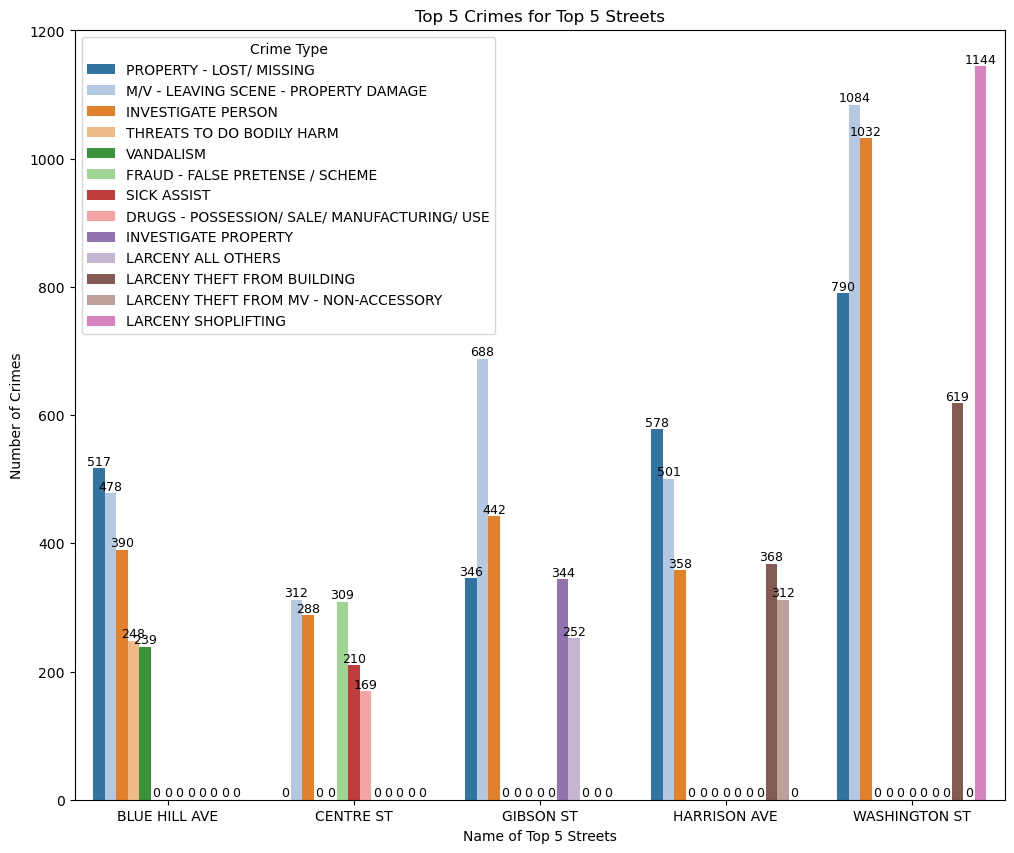

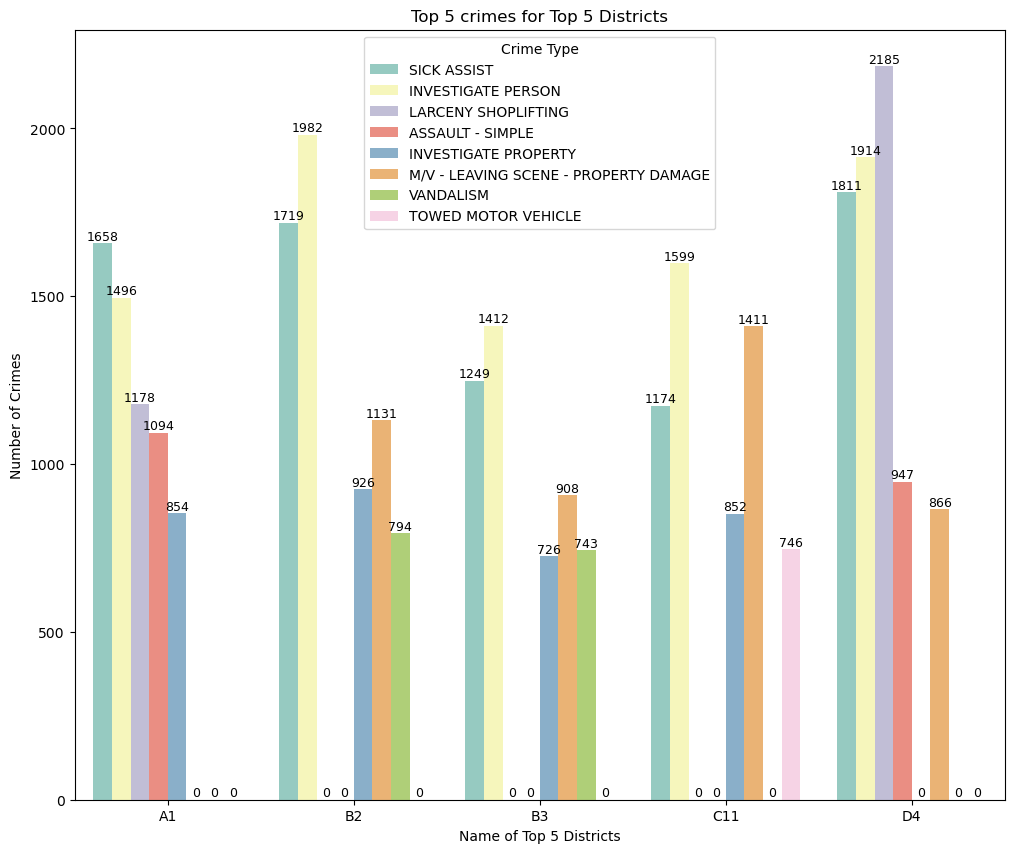

In [36]:
# Bar chart for top 5 crimes of top 5 Streets 
plt.figure(figsize=(12, 10))
ax = sns.barplot(top_5_offenses_street, x='STREET', y='Number_Crimes', hue='OFFENSE_DESCRIPTION', estimator="sum", errorbar=None, palette="tab20")
# showing the value of each crime in each bar
for i in ax.containers:
    ax.bar_label(i,fontsize=9)
plt.title('Top 5 Crimes for Top 5 Streets')
plt.xlabel('Name of Top 5 Streets')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.show()

# Bar graph of top 5 crime of top 5 Districts 
plt.figure(figsize=(12, 10))
ax = sns.barplot(top_5_offenses_per_district, x='DISTRICT', y='Number_Crimes', hue='OFFENSE_DESCRIPTION', estimator="sum", errorbar=None,palette='Set3')
# showing the value of each crime in each bar
for i in ax.containers:
    ax.bar_label(i,fontsize=9)
plt.title('Top 5 crimes for Top 5 Districts')
plt.xlabel('Name of Top 5 Districts')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.show()


# 3. TOP 3 districts and Street have the highest incidents of shooting-related crimes
 - 1. select target features ['SHOOTING' , 'DISTRICT' , 'STREET']
 - 2. select rows that only have shooting incidents
 - 3. calculating the total number of shooting incidents in each street and district
 - 4. make a order from highest number to the lowest and select top 3 streets and districts

In [11]:
# Step 1: Select relevant columns
Target_features = ['SHOOTING','DISTRICT','STREET']
shooting_df = df[Target_features]

# select rows that only have shooting incidents
shooting_df = shooting_df[shooting_df['SHOOTING'] == 1]

# Group the data by 'STREET' and calculate the total number of shooting incidents. 
# Reset index and name the count column as 'Shooting_Incidents'
shooting_street = shooting_df.groupby('STREET').size().reset_index(name = 'Shooting_Incidents')

# Sort the data to find top 3 streets of highest shooting incident
shooting_street = shooting_street.sort_values(by='Shooting_Incidents', ascending=False)

# only looking for the top 3 streets 
shooting_street.head(3)

,STREET,Shooting_Incidents
552,WASHINGTON ST,45
56,BLUE HILL AVE,33
98,CENTRE ST,27


In [12]:
# Group the data by 'DISTRICT' and calculate the total number of shooting incidents. 
# Reset index and name the count column as 'Shooting_Incidents'
shooting_district = shooting_df.groupby('DISTRICT').size().reset_index(name = 'Shooting_Incidents')

# Sort the data to find top 3 streets of highest shooting incident
shooting_district = shooting_district.sort_values(by='Shooting_Incidents', ascending=False)

# only looking for the top 3 streets 
shooting_district.head(3)

,DISTRICT,Shooting_Incidents
3,B2,246
4,B3,238
5,C11,225


In [13]:
# Using the function above to achieve the name of the top 3 streets and districts with hightest frequency of shooting incident.
top3_shooting_district = top_num(shooting_district,'DISTRICT',3)
top3_shooting_street = top_num(shooting_street,'STREET',3)

print(f'TOP 3 districts have the highest incidents of shooting-related crimes:{top3_shooting_district}')
print(f'TOP 3 Street have the highest incidents of shooting-related crimes:{top3_shooting_street}')

TOP 3 districts have the highest incidents of shooting-related crimes:['B2', 'B3', 'C11']
TOP 3 Street have the highest incidents of shooting-related crimes:['WASHINGTON ST', 'BLUE HILL AVE', 'CENTRE ST']
